In [251]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
import scipy.special as special
import astropy.units as u
import warnings
from scipy.integrate import quad
from scipy.optimize import fsolve
from sympy import *
import scipy.integrate as integ
%matplotlib inline
warnings.filterwarnings('ignore')

# Question 1:

# $(\frac{a'(t)}{a(t)})^2 = \frac{8 \cdot \Pi \cdot G \cdot \varepsilon(t)}{3 \cdot c^2} - \frac{k \cdot c^2}{a(t)^2}$ 


# $\frac{a''(t)}{a(t)} = \frac{-4 \cdot \Pi \cdot G}{3 \cdot c^2} \cdot [\varepsilon(t) + 3 \cdot P(t)]$

My first step is going to take the derivative of our first equation

$2 \cdot \frac{a'(t)}{a(t)} \cdot (\frac{a''(t)}{a(t)} - \frac{a'(t)}{a(t)^2} \cdot a'(t)) = \frac{8 \cdot \Pi \cdot G \cdot \varepsilon'(t)}{3 \cdot c^2} + \frac{2 \cdot k \cdot c^2}{a(t)^3} \cdot a'(t)$

Next divide both sides by $\frac{a'(t)}{a(t)}$ and 2

$(\frac{a''(t)}{a(t)} - \frac{a'(t)}{a(t)^2} \cdot a'(t)) = \frac{4 \cdot \Pi \cdot G \cdot \varepsilon'(t)}{3 \cdot c^2} \cdot \frac{a(t)}{a'(t)} + \frac{k \cdot c^2}{a(t)^2} \to \frac{a''(t)}{a(t)} = \frac{4 \cdot \Pi \cdot G \cdot \varepsilon'(t)}{3 \cdot c^2} \cdot \frac{a(t)}{a'(t)} +
\frac{k \cdot c^2}{a(t)^2} + (\frac{a'(t)}{a(t)})^2$

Now we can substite equation two.

$\frac{-4 \cdot \Pi \cdot G}{3 \cdot c^2} \cdot [\varepsilon(t) + 3 \cdot P(t)] = \frac{4 \cdot \Pi \cdot G \cdot \varepsilon'(t)}{3 \cdot c^2} \cdot \frac{a(t)}{a'(t)} + \frac{k \cdot c^2}{a(t)^2} + (\frac{a'(t)}{a(t)})^2$

Since we have an $(\frac{a'(t)}{a(t)})^2$ we can subsitute equation one back in. 

This gives us $\frac{-4 \cdot \Pi \cdot G}{3 \cdot c^2} \cdot [\varepsilon(t) + 3 \cdot P(t)] = \frac{4 \cdot \Pi \cdot G \cdot \varepsilon'(t)}{3 \cdot c^2} \cdot \frac{a(t)}{a'(t)} + \frac{k \cdot c^2}{a(t)^2} + \frac{8 \cdot \Pi \cdot G \cdot \varepsilon(t)}{3 \cdot c^2} - \frac{k \cdot c^2}{a(t)^2}$ 

Cancelling some terms gives us: $\frac{-4 \cdot \Pi \cdot G}{3 \cdot c^2} \cdot [\varepsilon(t) + 3 \cdot P(t)] = \frac{4 \cdot \Pi \cdot G \cdot \varepsilon'(t)}{3 \cdot c^2} \cdot \frac{a(t)}{a'(t)} + \frac{8 \cdot \Pi \cdot G \cdot \varepsilon(t)}{3 \cdot c^2}$ $\to [\varepsilon(t) + 3 \cdot P(t)] = -\varepsilon'(t) \cdot \frac{a(t)}{a'(t)} - 2 \cdot \varepsilon(t)$

Moving over some terms gives us: $\varepsilon'(t) + ([\varepsilon(t) + 3 \cdot P(t)] + 2 \cdot \varepsilon(t)) \cdot \frac{a'(t)}{a(t)} = 0$

Finally, pulling the 3 out of the brackets and a little more reducing gives us our result: $\varepsilon'(t) + 3 \cdot \frac{a'(t)}{a(t)} \cdot [\varepsilon(t) + P(t)] = 0$  

# Question 2:

a) part 1:

$H(z) = H_0 \cdot \sqrt{\Omega_r \cdot (1+z)^4 + \Omega_m \cdot (1+z)^3 + \Omega_\Lambda + (1-\Omega_0) \cdot (1+z)^2}$

$\Omega_m = .3, \Omega_\Lambda = .7$

$\Omega_0 = \Omega_r + \Omega_m + \Omega_\Lambda = 1$

$\to H(z) = H_0 \cdot \sqrt{.3 \cdot (1+z)^3 + .7}$

Comoving Distance: $r(z) = c \cdot \int \frac{1}{H(z)}$ from 0 to t

In [369]:
def H(z):
    h = 70
    result = h*((.3*(1+z)**3 + .7)**(1.0/2.0))
    return result

def r(z):
    c = 3*(10**5)
    result = c/H(z)
    return result

In [338]:
t = np.linspace(0, 10, 100)

Problem2 = {}
Problem2['z'] = []
Problem2['ans0'] = []
for i in enumerate(t):
#     print i[1]
    ans0, err = quad(r, 0, i[1])
    Problem2['z'].append(i[0])
    Problem2['ans0'].append(ans0)
#     print i[0],ans0

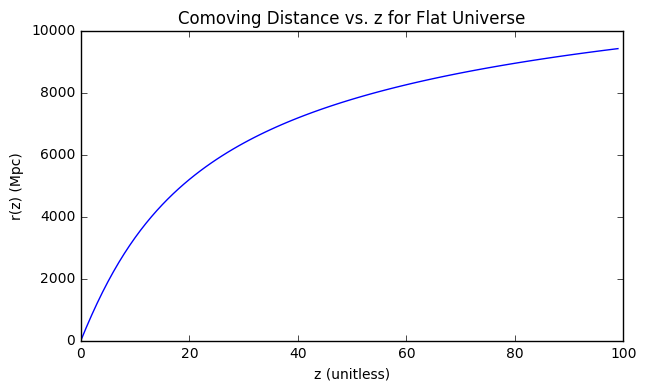

In [339]:
plt.plot(Problem2['z'], Problem2['ans0'] )
fig = plt.gcf()
fig.set_size_inches(7, 4)
plt.xlabel('z (unitless)')
plt.ylabel('r(z) (Mpc)')
plt.title('Comoving Distance vs. z for Flat Universe')

Had an issue with the linspace code which is affecting the scaling of the x-axis. The graph says that z is 0 to 100 when it is in fact 0 to 10. Was unable to fix it.

a) part 2

For this part I used the equation $t = \int \frac{1}{H(z) \cdot (1+z)}$ from z = 0 to z = 10

In [371]:
def t(z):
    result = Mpc*(1/(H(z)*(1+z)))/(3.154*(10**16)) #Multiplied by constants to get the answer in Gyr
    return result
ans, err = quad(t, 0, 1000)
print ans

13.4753695511


In [372]:
h0 = 70 #units in km/s/Mpc
Mpc = 3.086*(10**19) #number of kilometers in one Mpc
h02 = h0/Mpc
print h02

2.26830848995e-18


In [373]:
line = np.linspace(0, 10, num=100) 

Problem2 = {}
Problem2['z'] = []
Problem2['ans0'] = []
for i in enumerate(line):
#     print i[1]
    ans0, err = quad(t, 0, i[1])
    Problem2['z'].append(i[0])
    Problem2['ans0'].append(ans0)
#     print i[0],ans0

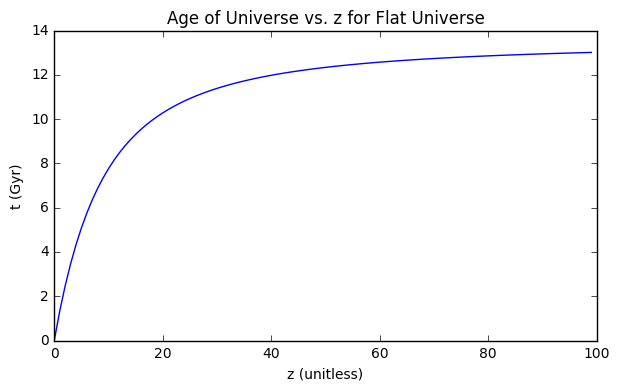

In [300]:
plt.plot(Problem2['z'], Problem2['ans0'] )
fig = plt.gcf()
fig.set_size_inches(7, 4)
plt.xlabel('z (unitless)')
plt.ylabel('t (Gyr)')
plt.title('Age of Universe vs. z for Flat Universe')

As before, still having an issue with linspace, the scaling of the x-axis should be z=0 and z=10.

b) part 1:

In [289]:
def H2(z):
    h = 70
    result = (h*(10*(1+z)**3 - 9*(1+z)**2)**(.5))
    return result

def r2(z):
    c = 3*(10**5)
    result = c / H2(z)
    return result

In [290]:
line = np.linspace(0,10,100)

Problem2 = {}
Problem2['z'] = []
Problem2['ans0'] = []
for i in enumerate(line):
#     print i[1]
    ans0, err = quad(r2, 0, i[1])
    Problem2['z'].append(i[0])
    Problem2['ans0'].append(ans0)
#     print i[0],ans0

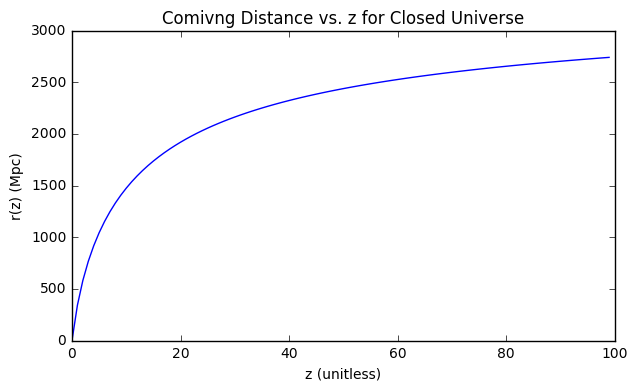

In [291]:
plt.plot(Problem2['z'], Problem2['ans0'])
fig = plt.gcf()
fig.set_size_inches(7, 4)
plt.xlabel('z (unitless)')
plt.ylabel('r(z) (Mpc)')
plt.title('Comivng Distance vs. z for Closed Universe')

b) part 2:

In [374]:
def t2(z):
    result = Mpc*(1/(H2(z)*(1+z)))/(3.154*(10**16))
    return result
ans, err = quad(t2, 0, 1000)
print ans

4.91305199725


In [302]:
line = np.linspace(0, 1, num=100) 

Problem2 = {}
Problem2['z'] = []
Problem2['ans0'] = []
for i in enumerate(line):
#     print i[1]
    ans0, err = quad(t2, 0, i[1])
    Problem2['z'].append(i[0])
    Problem2['ans0'].append(ans0)
#     print i[0],ans0

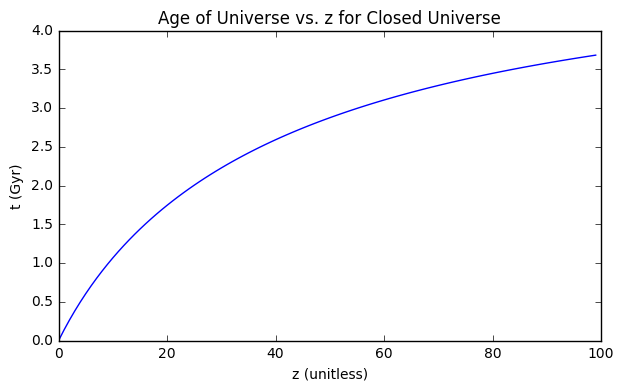

In [303]:
plt.plot(Problem2['z'], Problem2['ans0'])
fig = plt.gcf()
fig.set_size_inches(7, 4)
plt.xlabel('z (unitless)')
plt.ylabel('t (Gyr)')
plt.title('Age of Universe vs. z for Closed Universe')

Again, all the graphs are from z = 0 to z = 10, sorry for the confusion!

# Question 3:

For a universe with just $\Omega_r$ and where $\Omega_m$ and $\Omega_\Lambda = 0$ we get $H(z) = H_0 \cdot \sqrt{\Omega_r \cdot (1+z)^4 + (1-\Omega_r) \cdot (1+z)^2}$ 

We calculate before that t(z) equals 13.01, therefore we can say that $\int \frac{1}{H(z) \cdot (1+z)} = 13.475 Gyr$ when z = 0 and z = 10

In [367]:
def H3(z): #setting Omega_r = 0
    h = 70
    result = h*(1+z)
    return result

def t3(z):
    result = (Mpc*1/(H3(z)*(1+z)))/(3.154*(10**16))
    return result

In [375]:
ans, err = quad(t3, 0, 1000)
print ans

13.9637516211


In [453]:
def H4(z):
    h = 70
    result = h*((.001388639*(1+z)**4 + (1-.001388639)*(1+z)**2)**(.5))
    return result

def t4(z):
    result = Mpc*(1/(H4(z)*(1+z)))/(3.154*(10**16))
    return result

In [454]:
ans, err = quad(t4, 0, 1000)
print ans

13.4753690844


After messing around with the above equations, I get an approximate value for $\Omega_{r,0}$ to be about .001388639. 